# K-nearest neighbours

This implementation of k-nearest neighbours uses Jake Vanderplas' excellent Python Data Science Handbook. The example is here: (https://jakevdp.github.io/PythonDataScienceHandbook/02.08-sorting.html).

It uses broadcasting and row-wise sorting, which is more computational efficient than writing a loop.

# Generate dummy data

In [1]:
# import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# set to plot automatically
%matplotlib inline

In [2]:
# set random state so repeatable results
np.random.seed(42)

In [3]:
# Generate random set of 10 points from U(0,1)
X = np.random.uniform(0,1,size=(10,2))

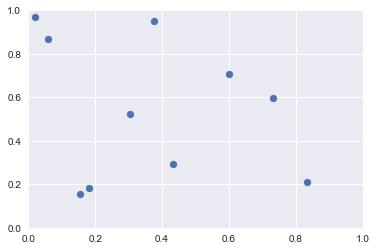

In [4]:
plt.scatter(X[:,0],X[:,1]);
plt.xlim(0,1);
plt.ylim(0,1);

# Compute squared distances between points

Numpy's new axis can convert the two-dimensional X-array into a three-dimensional array by making use of the newaxis keyword within a slice operation.

In [5]:
# shape of initial X matrix
print(X.shape)
# shape of X axis with an axis added to the second dimension
print((X[:, np.newaxis, :]).shape)
# shape of X axis with an axis added to the first dimension
print(X[np.newaxis, :, :].shape)

(10, 2)
(10, 1, 2)
(1, 10, 2)


Numpy's newaxis can be used to calculate the differences between each pair of points via numpy's broadcasting rules. These allow the subtraction to be performed on arrays of different sizes.  The dimension with only 1 value is stetched to meet the shape of the other (10 values) for both the first and second dimension. This creates an array with shape (10,10,2) as the first and second dimension ahs been stretched to length 10.

In [6]:
# for each pair of points, compute differences in their coordinates
# this uses numpys broadcast rules and creates an array of shape (10,10,2)
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
print(differences.shape)

(10, 10, 2)


In [7]:
# then square the differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [8]:
# then sum the differences to get the squared distance
dist_sq = np.sum(sq_differences,axis=2)
dist_sq.shape

(10, 10)

You can check that it works by looking at the digaonal, which is the distances between each point and itself and should be zero:

In [9]:
print(dist_sq.diagonal())

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


# Find nearest neighbours using argsort or argpartition

argsort can then be used to sort along each row. This gives the index of the nearest neighbour. The left most-column gives the numbers 0-9 in that order due to the fact that each point's closet neighbour is itself.

In [10]:
# one way of finding the nearest neighbours is to sort the elements row-wise
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


We can find the k-nearest neightbours by partioning each row so that the smallest k+1 squared distances come first. argpartition performs an indirect partition along the given axis. It returns an array of indices of the same shape as a that index data along the given axis in partitioned order. The k-th element will be in its final sorted position and all smaller elements will be moved before it and all larger elements behind it.

Note we need k+1 as one of the elements is the point itself.

In [11]:
# partioning is more efficient though as we don't technically need to sort the elements after k
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
print(nearest_partition)

[[3 0 4 5 8 9 1 7 2 6]
 [1 4 6 9 3 5 2 7 8 0]
 [2 7 9 8 6 4 5 1 3 0]
 [3 5 0 8 4 1 6 7 2 9]
 [1 4 0 8 9 6 2 7 5 3]
 [5 3 0 8 4 1 6 7 2 9]
 [1 9 6 4 3 5 2 7 8 0]
 [7 2 9 8 6 4 5 1 3 0]
 [8 9 4 7 2 3 0 1 5 6]
 [8 7 9 2 1 6 4 5 3 0]]


# Visualize

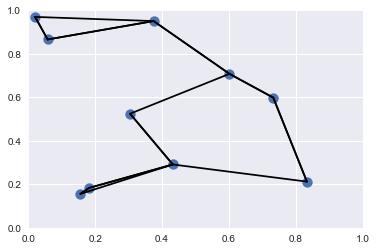

In [12]:
# first plot the points
plt.scatter(X[:,0],X[:,1],s=100); # s sets the size of the points
plt.xlim(0,1);
plt.ylim(0,1);

# then draw lines from each point to its two nearest neighbors
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')